# Data
A dataset of arthropod images was obtained from Kaggle (Geir Drange, 2020). This dataset (manually compiled from iNaturalist and similar sources), contains 15376 files of 7 taxa (orders) of arthropods:
* Araneae (spiders)
* Coleoptera (beetles)
* Diptera (flies)
* Hemiptera (cicadas, aphids, ...)
* Hymenoptera (wasps, bees, ...)
* Lepidoptera (butterflies, moths)
* Odonata (dragonflies, ...)
Most images are taken in the wild, using a variety of foto equipment by multiple authors. Most images contain one specimen of interest, but some contain multiple specimens of the same or of different taxa.

This dataset is licensed as CC BY-NC-SA 4.0.

In [4]:
DATA_PATH = 'data'  # for local notebook
# DATA_PATH = '/kaggle/input/arthropod-taxonomy-orders-object-detection-dataset/'  # for kaggle notebook

## Reformat the images

* Resize the image, to save memory and processing time.
* Transform the images into numpy arrays.
* Keep only the red channel, to save memory and processing time. Assuming pictures of insects on green leaves are most contrasted in the red channel.
* Test the function by plotting the first image.

In [1]:
from os import listdir
from os.path import isfile, join
from PIL import Image
import numpy as np

In [18]:
def format_image(path):
    """Takes a path to an image as input. Loads and rescales the image.
    Returns a numpy array representing the the image."""
    size = (168, 120)
    # Load the image using PIL
    pillow_img = Image.open(path)
    pillow_img = pillow_img.resize(size)
    img = np.array(pillow_img)
    # return(img[:,:,1] ) # 0: red, 1: green, 2: blue channel
    return(img)

Try out the function on a test image

shape: (120, 168, 3)
min: 6 max: 255
dtype: uint8


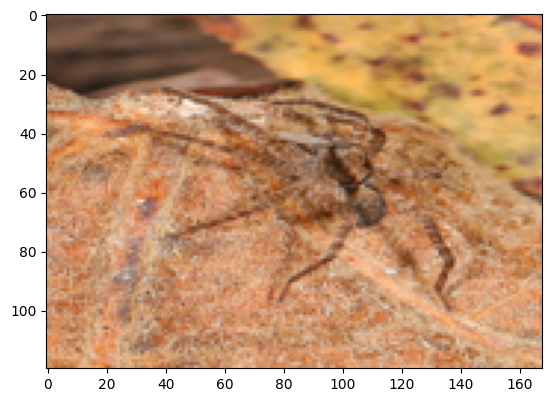

In [19]:
# Test the function on an example image 
#path = "/kaggle/input/arthropod-taxonomy-orders-object-detection-dataset/ArTaxOr/Araneae/003eb3db1665.jpg"
#path = join(DATA_PATH, 'ArTaxOr/Araneae/003eb3db1665.jpg')
path = join(DATA_PATH, 'ArTaxOr/Araneae/0a158a2a38d2.jpg')

img = format_image(path)
print('shape:', img.shape)
print('min:', img.min(), 'max:', img.max()) # min: 0 max: 255
print('dtype:', img.dtype) # uint8

%matplotlib inline
import matplotlib.pyplot as plt

# Plot the Green channel
plt.imshow(img, cmap=plt.cm.Greys) # Greens colormap
plt.show()

## Create feature matrix

* Create a matrix of features (image pixels) vs. labels (taxa)
* Split the data into train, validation and test datasets

In [20]:

def make_matrix_from_dir(path):
    """Takes a dir as argument and returns two numpy arrays: features and labels"""
    # the feature matrix and labels list
    features = []  # the pixel data
    labels = []  # the image labels (species)

    # get a list of all images in the dataset
    taxa_in_dataset = [taxon for taxon in listdir(path) if not isfile(join(path, taxon))]
    for taxon in taxa_in_dataset:
        print(f"Processing taxon {taxon}")
        taxon_path = join(path, taxon)
        file_paths = [f for f in listdir(taxon_path) if isfile(join(taxon_path, f))]
        # load the images
        for file_path in file_paths:
            # load image, convert to numpy array with 3 channels: RGB
            # resize and flatten the image to a 1-dimensional array,
            flat_img = format_image(join(taxon_path, file_path)).flatten()
            features.append(flat_img)
            labels.append(taxon)
    # format the features array to a vector of dimensions (num_images, num_pixels_in_each_image)
    X = np.array(features)
    # convert features to floats (as expected by scikit-learn)
    X = X.astype(float)
    # pack labels in numpy array
    y = np.array(labels)
    return X, y

In [21]:
%%time
from sklearn.model_selection import train_test_split

images_path = join(DATA_PATH, 'ArTaxOr')

# Create a matrix of features (image pixels) vs. labels (taxa)
X, y = make_matrix_from_dir(images_path)

Processing taxon Hymenoptera
Processing taxon Lepidoptera
Processing taxon Coleoptera
Processing taxon Hemiptera
Processing taxon Araneae
Processing taxon Diptera
Processing taxon Odonata
CPU times: user 7min 47s, sys: 15.7 s, total: 8min 2s
Wall time: 8min 2s


Save the processed data for later use

In [22]:
np.savez_compressed(join(DATA_PATH, 'processed_data.npz'), X=X, y=y)

## References

Geir Drange (2020). Arthropod Taxonomy Orders Object Detection Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/1240192

Pedregosa et al. (2011), Scikit-learn: Machine Learning in Python, JMLR 12, pp. 2825-2830.